In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.cluster import KMeans

In [2]:
filename= 'car_evaluation.csv'
names=['Price','Maintenance','Doors','Passengers','Luggage','Safety','Evaluation']
df = pd.read_csv(filename,names=names)

In [6]:
df2=df.replace(0, np.nan)
print (df2.isnull().sum())

Price          0
Maintenance    0
Doors          0
Passengers     0
Luggage        0
Safety         0
Evaluation     0
dtype: int64


In [7]:
print(df2.shape)

(1728, 7)


In [8]:
print(df2.dtypes)

Price          object
Maintenance    object
Doors          object
Passengers     object
Luggage        object
Safety         object
Evaluation     object
dtype: object


In [9]:
print(df2.head(5))

   Price Maintenance Doors Passengers Luggage Safety Evaluation
0  vhigh       vhigh     2          2   small    low      unacc
1  vhigh       vhigh     2          2   small    med      unacc
2  vhigh       vhigh     2          2   small   high      unacc
3  vhigh       vhigh     2          2     med    low      unacc
4  vhigh       vhigh     2          2     med    med      unacc


In [10]:
print(df2.describe())

        Price Maintenance Doors Passengers Luggage Safety Evaluation
count    1728        1728  1728       1728    1728   1728       1728
unique      4           4     4          3       3      3          4
top     vhigh       vhigh     2          2   small    low      unacc
freq      432         432   432        576     576    576       1210


In [37]:
print(df2.groupby('Evaluation').size())

Evaluation
0     384
1      69
2    1210
3      65
dtype: int64


In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
non_numeric_columns = df2.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

In [39]:
# Store dataframe values into a numpy array
array = df2.values
array = np.asarray(array)
# separate array into input and output components by slicing
# For X (input)
X = array[:,1:7]
# For Y (input)
Y = array[:,6]
df2.Evaluation = pd.Categorical(df2.Evaluation)
df2['Evaluation'] = df2.Evaluation.cat.codes

In [40]:
print(df2.dtypes)

Price          int32
Maintenance    int32
Doors          int32
Passengers     int32
Luggage        int32
Safety         int32
Evaluation      int8
dtype: object


In [41]:
model = KMeans(n_clusters=3)
model.fit(X)

C:\Users\manda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [42]:
centroids = model.cluster_centers_
print(centroids)

[[1.38952164 1.61958998 1.49886105 0.8952164  0.98405467 0.12528474]
 [0.48012719 1.45468998 0.81399046 1.0317965  0.99523052 2.04928458]
 [2.54545455 1.46363636 0.84545455 1.03939394 1.01515152 2.03030303]]


In [43]:
cluster_labels = model.labels_[::10]
print (cluster_labels)

[2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 0 2 2 0 2 0 0 1 0 0 1
 1 1 1 0 1 1 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 1 0 0 1 1 2 2 2 2 2 0 2 2 2
 0 2 1 0 1 1 0 1 1 0 1 0 0 2 0 0 2 2 2 2 0 2 2 0 1 1 1 0 1 1 0 1 1 0 2 0 2
 2 0 2 2 0 2 2 0 1 1 0 1 1 0 1 1 1 0 1 2 0 2 2 0 2 2 0 2 0 0 1 0 1 1 0 1 1
 0 1 1 0 2 2 2 2 2 2 2 2 2 2 1 0 1 1 0 1 1 0 1 1 0]


In [44]:
cluster_labels = model.labels_
print (cluster_labels)

[2 2 2 ... 1 0 1]


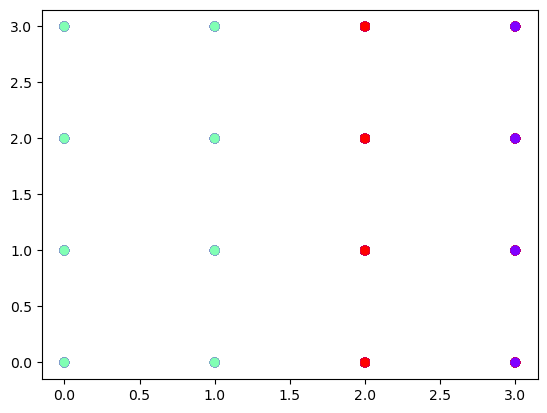

In [45]:
pyplot.scatter (X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
pyplot.show()

C:\Users\manda\AppData\Local\Temp\ipykernel_31708\39166585.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  lines= pyplot.plot(centroids[0,0], centroids[0,1], 'kx', color='black')
C:\Users\manda\AppData\Local\Temp\ipykernel_31708\39166585.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  lines = pyplot.plot(centroids[1,0], centroids[1,1], 'kx', color='black')
C:\Users\manda\AppData\Local\Temp\ipykernel_31708\39166585.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  lines= pyplot.plot(centroids[2,0], centroids[2,1], 'kx', color='black')


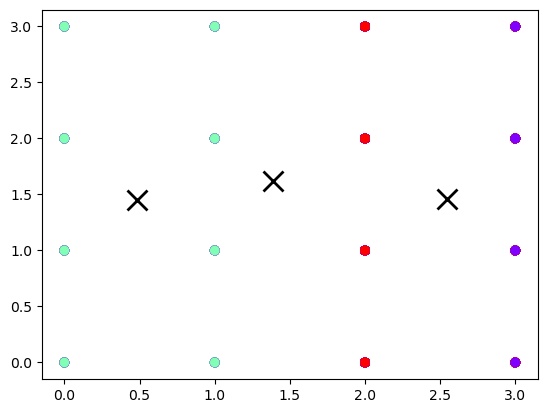

In [46]:
pyplot.scatter (X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
lines= pyplot.plot(centroids[0,0], centroids[0,1], 'kx', color='black')
pyplot.setp(lines,ms=15.0)
pyplot.setp(lines, mew=2.0)
lines = pyplot.plot(centroids[1,0], centroids[1,1], 'kx', color='black')
pyplot.setp(lines,ms=15.0)
pyplot.setp(lines, mew=2.0)
lines= pyplot.plot(centroids[2,0], centroids[2,1], 'kx', color='black')
pyplot.setp (lines,ms=15.0)
pyplot.setp (lines, mew=2.0)
pyplot.show()

In [47]:
new_data = {
    'Price': ['vhigh'],
    'Maintenance': ['vhigh'],
    'Doors': [2],
    'Passengers': [2],
    'Luggage': ['small'],
    'Safety': ['low']
}
new_df = pd.DataFrame(new_data)

In [48]:
label_encoder = LabelEncoder()
non_numeric_columns = new_df.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    new_df[col] = label_encoder.fit_transform(new_df[col])

In [49]:
predicted = model.predict(new_df)
print(predicted)

[0]


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [50]:
new_data1 = {
    'Price': ['vhigh'],
    'Maintenance': ['med'],
    'Doors': [2],
    'Passengers': [4],
    'Luggage': ['small'],
    'Safety': ['high']
}
new_df1 = pd.DataFrame(new_data1)

In [51]:
label_encoder = LabelEncoder()
non_numeric_columns = new_df1.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    new_df1[col] = label_encoder.fit_transform(new_df1[col])

In [52]:
predicted = model.predict(new_df1)
print(predicted)

[0]


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
